In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [3]:
# comms
sampFreq10_0, sound10 = wavfile.read('batched_1_hr_audio/CH10_batch_0.wav')
sampFreq14_0, sound14 = wavfile.read('batched_1_hr_audio/CH14_batch_0_upsampled.wav')
sampFreq16_0, sound16 = wavfile.read('batched_1_hr_audio/CH16_batch_0.wav')
sampFreq73_0, sound73 = wavfile.read('batched_1_hr_audio/CH73_batch_0.wav')

# other open source audio
sampFreq_indo, sound_indo = wavfile.read('batched_1_hr_audio/indo.wav') # indo podcast
sampFreq_zoom, sound_zoom = wavfile.read('batched_1_hr_audio/zoom.wav') # en zoom
sampFreq_lhl, sound_lhl = wavfile.read('batched_1_hr_audio/lhl.wav') # en conference

In [5]:
sampFreq10_0, sampFreq14_0, sampFreq16_0, sampFreq73_0

(16000, 16000, 16000, 16000)

In [4]:
sound10 = sound10 / 2.0**15
sound14 = sound14 / 2.0**15
sound16 = sound16 / 2.0**15
sound73 = sound73 / 2.0**15

In [5]:
sound_indo = sound_indo / 2.0**15
sound_zoom = sound_zoom / 2.0**15
sound_lhl = sound_lhl / 2.0**15

In [8]:
sound10.shape, sound14.shape, sound16.shape, sound73.shape

((57655008,), (57600000,), (57618816,), (57614176,))

In [9]:
sound_indo.shape, sound_zoom.shape, sound_lhl.shape

((145950790, 2), (191878374, 2), (128178051, 2))

In [6]:
length_in_s_10 = sound10.shape[0] / sampFreq10_0
length_in_s_14 = sound14.shape[0] / sampFreq14_0
length_in_s_16 = sound16.shape[0] / sampFreq16_0
length_in_s_73 = sound73.shape[0] / sampFreq73_0
length_in_s_10, length_in_s_14, length_in_s_16, length_in_s_73

(3603.438, 3600.0, 3601.176, 3600.886)

In [7]:
length_in_s_indo = sound_indo.shape[0] / sampFreq10_0
length_in_s_zoom = sound_zoom.shape[0] / sampFreq14_0
length_in_s_lhl = sound_lhl.shape[0] / sampFreq16_0
length_in_s_indo, length_in_s_zoom, length_in_s_lhl

(9121.924375, 11992.398375, 8011.1281875)

In [12]:
# # plt.subplot(2,1,1)
# plt.plot(sound10[:], 'r', label='CH 10')
# plt.plot(sound14[:], 'b', label='CH 14')
# plt.plot(sound16[:], 'g', label='CH 16')
# plt.plot(sound73[:], 'y', label='CH 73')
# plt.legend(loc="upper right")
# plt.xlabel("channel, sample #")
# # plt.subplot(2,1,2)
# # plt.plot(sound[:,1], 'b')
# # plt.xlabel("right channel, sample #")
# plt.tight_layout()
# plt.show()

In [8]:
time10 = np.arange(sound10.shape[0]) / sound10.shape[0] * length_in_s_10
time14 = np.arange(sound14.shape[0]) / sound14.shape[0] * length_in_s_14
time16 = np.arange(sound16.shape[0]) / sound16.shape[0] * length_in_s_16
time73 = np.arange(sound73.shape[0]) / sound73.shape[0] * length_in_s_73

In [9]:
time_indo = np.arange(sound_indo.shape[0]) / sound_indo.shape[0] * length_in_s_indo
time_zoom = np.arange(sound_zoom.shape[0]) / sound_zoom.shape[0] * length_in_s_zoom
time_lhl = np.arange(sound_lhl.shape[0]) / sound_lhl.shape[0] * length_in_s_lhl

In [10]:
# #plt.subplot(2,1,1)
# plt.plot(time10, sound10[:], 'r', label='CH 10')
# plt.plot(time14, sound14[:], 'b', label='CH 14')
# plt.plot(time16, sound16[:], 'g', label='CH 16')
# plt.plot(time73, sound73[:], 'y', label='CH 73')
# plt.legend(loc="upper right")
# plt.xlabel("time, s")
# plt.ylabel("signal, relative units")
# # plt.subplot(2,1,2)
# # plt.plot(time, sound[:,1], 'b')
# # plt.xlabel("time, s [right channel]")
# # plt.ylabel("signal, relative units")
# plt.tight_layout()
# plt.show()

In [10]:
signal10 = sound10[:]
signal14 = sound14[:]
signal16 = sound16[:]
signal73 = sound73[:]

In [11]:
signal_indo = sound_indo[:, 0]
signal_zoom = sound_zoom[:, 0]
signal_lhl = sound_lhl[:, 0]

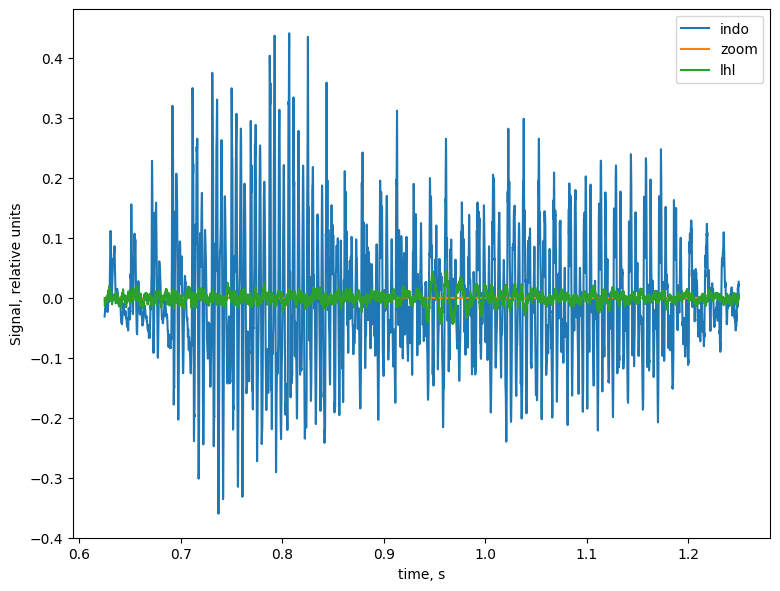

In [24]:
# plt.plot(time10[10000:20000], signal10[10000:20000], label='CH 10')
# plt.plot(time14[10000:20000], signal14[10000:20000], label='CH 14')
# plt.plot(time16[10000:20000], signal16[10000:20000], label='CH 16')
# plt.plot(time73[10000:20000], signal73[10000:20000], label='CH 73')

plt.plot(time_indo[10000:20000], signal_indo[10000:20000], label='indo')
plt.plot(time_zoom[10000:20000], signal_zoom[10000:20000], label='zoom')
plt.plot(time_lhl[10000:20000], signal_lhl[10000:20000], label='lhl')

plt.legend(loc="upper right")
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

In [12]:
# moving on to the fft part of the signal
fft_spectrum10 = np.fft.rfft(signal10)
freq10 = np.fft.rfftfreq(signal10.size, d=1./sampFreq10_0)
fft_spectrum14 = np.fft.rfft(signal14)
freq14 = np.fft.rfftfreq(signal14.size, d=1./sampFreq14_0)
fft_spectrum16 = np.fft.rfft(signal16)
freq16 = np.fft.rfftfreq(signal16.size, d=1./sampFreq16_0)
fft_spectrum73 = np.fft.rfft(signal73)
freq73 = np.fft.rfftfreq(signal73.size, d=1./sampFreq73_0)

In [13]:
fft_spectrum_indo = np.fft.rfft(signal_indo)
freq_indo = np.fft.rfftfreq(signal_indo.size, d=1./sampFreq_indo)
fft_spectrum_zoom = np.fft.rfft(signal_zoom)
freq_zoom = np.fft.rfftfreq(signal_zoom.size, d=1./sampFreq_zoom)
fft_spectrum_lhl = np.fft.rfft(signal_lhl)
freq_lhl = np.fft.rfftfreq(signal_lhl.size, d=1./sampFreq_lhl)

In [14]:
fft_spectrum10, fft_spectrum14, fft_spectrum16, fft_spectrum73

(array([-9.56756738e+07+0.00000000e+00j,  2.60576851e+07+3.74376714e+06j,
        -3.25765817e+07-9.11896565e+06j, ...,
        -1.19705411e+04-1.88977060e+04j, -5.59179271e+03-2.03675099e+03j,
         1.47781605e+04+0.00000000e+00j]),
 array([-2.38471155e+08+0.00000000e+00j,  3.53472617e+04-6.17471816e+01j,
         3.53470344e+04-1.23470399e+02j, ...,
        -1.35406195e+03-8.01877822e-02j, -1.35406272e+03-4.00928558e-02j,
         1.22250021e+04+0.00000000e+00j]),
 array([-7.53982446e+07+0.00000000e+00j, -9.73800873e+06+1.89594194e+07j,
         2.60977740e+05-7.01372793e+05j, ...,
         1.28365865e+03+5.13726240e+03j, -3.37022351e+03-1.79800683e+03j,
         2.95304807e+03+0.00000000e+00j]),
 array([-5.79357251e+07+0.00000000e+00j,  9.61239490e+06+1.34209457e+07j,
        -2.24884256e+07+6.20214738e+06j, ...,
        -2.34641793e+03-3.65576835e+03j, -2.85997948e+03+4.80258346e+02j,
        -5.49714471e+03+0.00000000e+00j]))

In [14]:
fft_spectrum_abs10 = np.abs(fft_spectrum10) / np.abs(max(fft_spectrum10))
fft_spectrum_abs14 = np.abs(fft_spectrum14) / np.abs(max(fft_spectrum14))
fft_spectrum_abs16 = np.abs(fft_spectrum16) / np.abs(max(fft_spectrum16))
fft_spectrum_abs73 = np.abs(fft_spectrum73) / np.abs(max(fft_spectrum73))

In [15]:
fft_spectrum_abs_indo = np.abs(fft_spectrum_indo) / np.abs(max(fft_spectrum_indo))
fft_spectrum_abs_zoom = np.abs(fft_spectrum_zoom) / np.abs(max(fft_spectrum_zoom))
fft_spectrum_abs_lhl = np.abs(fft_spectrum_lhl) / np.abs(max(fft_spectrum_lhl))

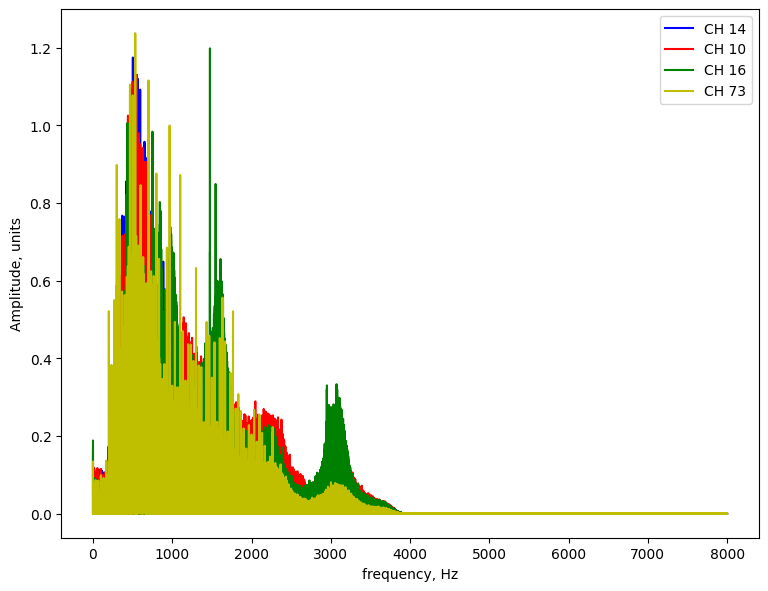

In [26]:
plt.plot(freq14, fft_spectrum_abs14, 'b', label='CH 14')
plt.plot(freq10, fft_spectrum_abs10, 'r', label='CH 10')
plt.plot(freq16, fft_spectrum_abs16, 'g', label='CH 16')
plt.plot(freq73, fft_spectrum_abs73, 'y', label='CH 73')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

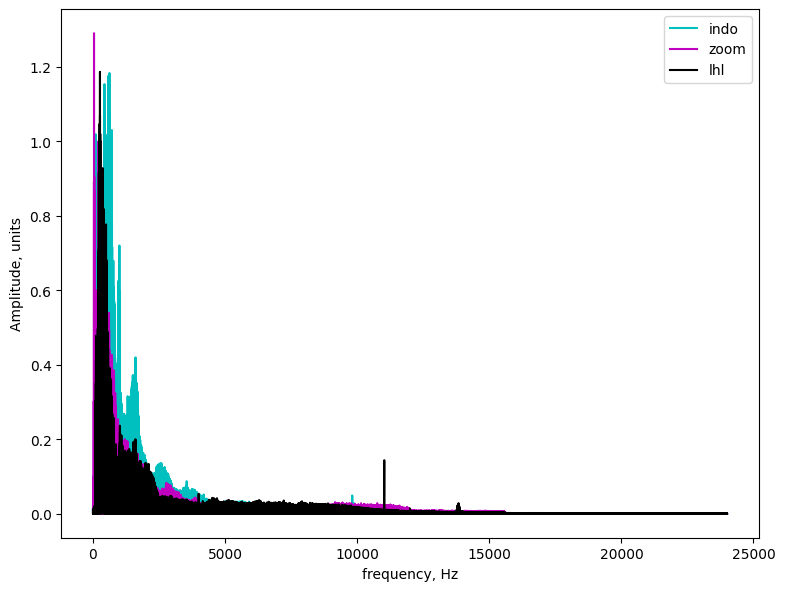

In [27]:
# youtube audio
plt.plot(freq_indo, fft_spectrum_abs_indo, 'c', label='indo')
plt.plot(freq_zoom, fft_spectrum_abs_zoom, 'm', label='zoom')
plt.plot(freq_lhl, fft_spectrum_abs_lhl, 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

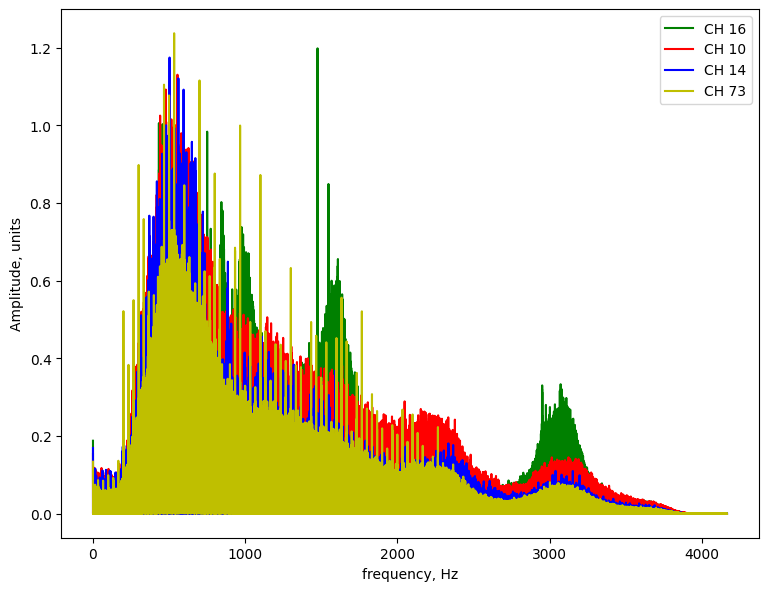

In [36]:
UPPER_LIM = 30000*500

plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'g', label='CH 16')
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')

plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'b', label='CH 14')
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'y', label='CH 73')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

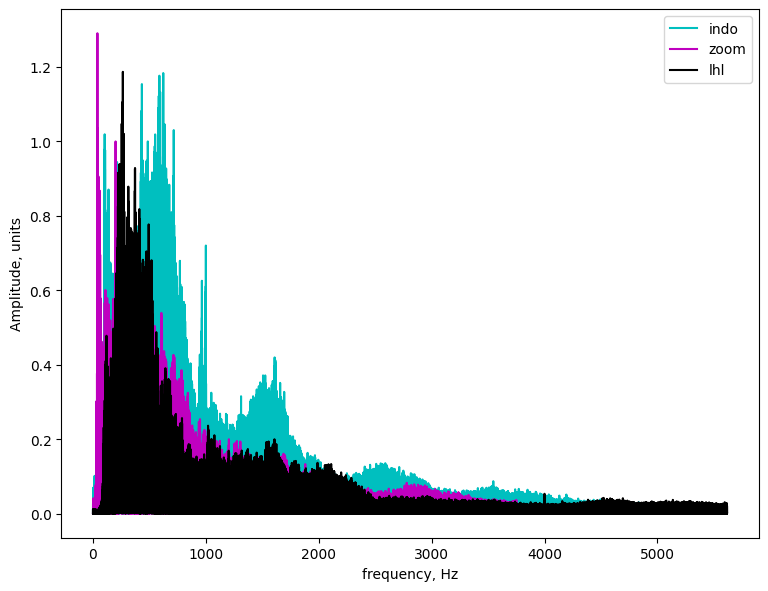

In [29]:
# youtube audio
UPPER_LIM = 30000*500
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

### compare the comms to the other open source audios from youtube

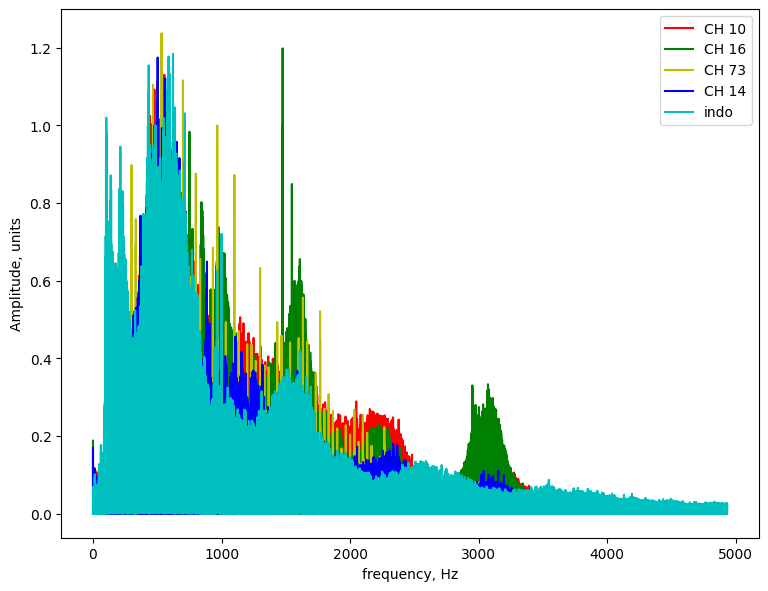

In [16]:
# 4 channels vs indo
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'g', label='CH 16')
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'y', label='CH 73')
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'b', label='CH 14')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

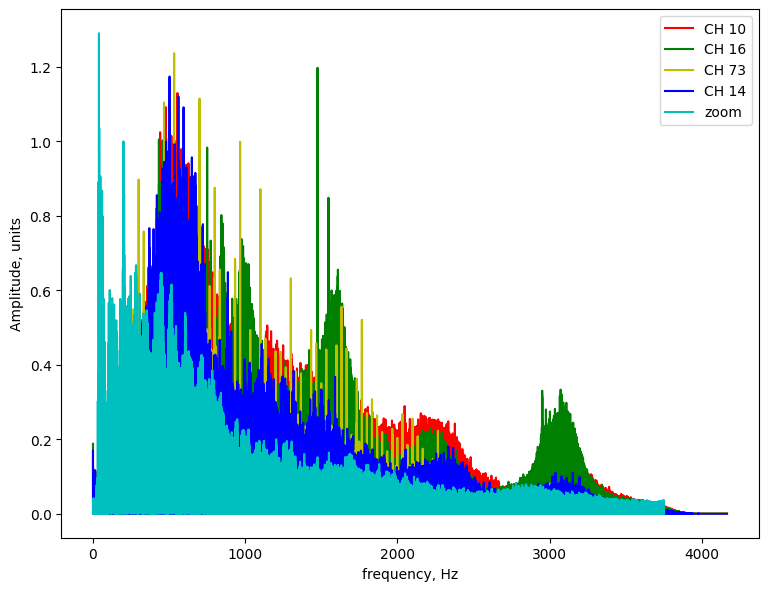

In [17]:
# 4 channels vs zoom
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'g', label='CH 16')
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'y', label='CH 73')
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'b', label='CH 14')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'c', label='zoom')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

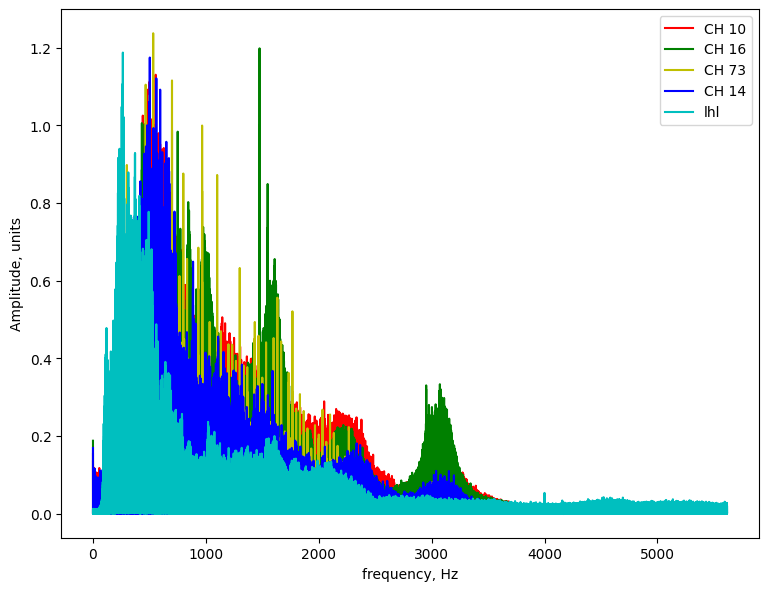

In [18]:
# 4 channels vs lhl
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'g', label='CH 16')
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'y', label='CH 73')
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'b', label='CH 14')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'c', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

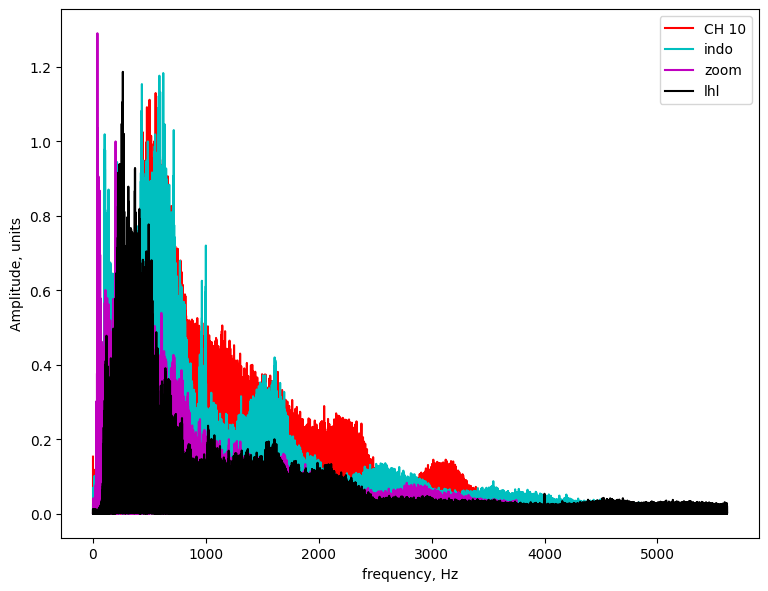

In [19]:
# ch 10 vs youtube
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

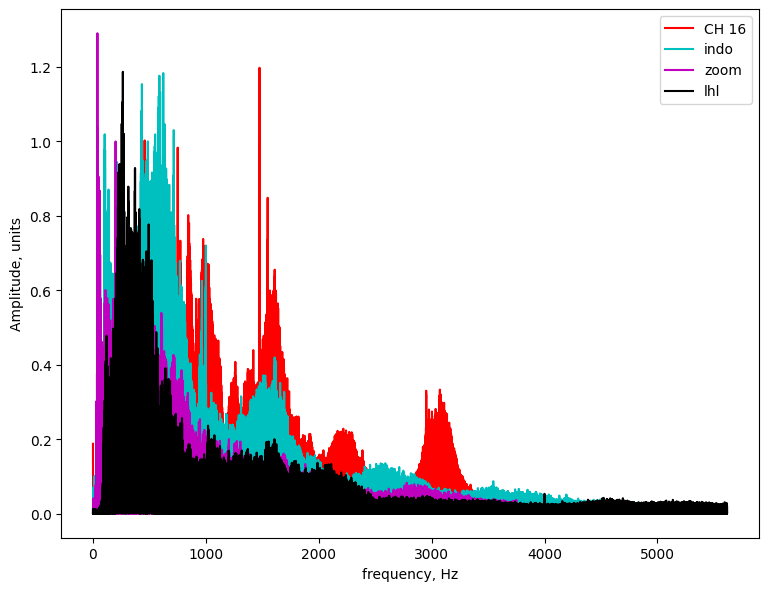

In [20]:
# ch 16 vs youtube
UPPER_LIM = 30000*500
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'r', label='CH 16')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

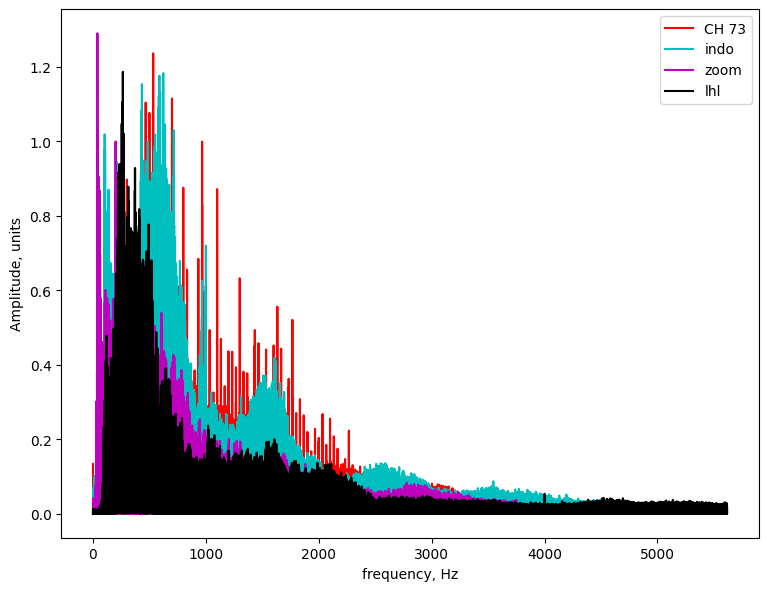

In [21]:
# ch 73 vs youtube
UPPER_LIM = 30000*500
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'r', label='CH 73')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

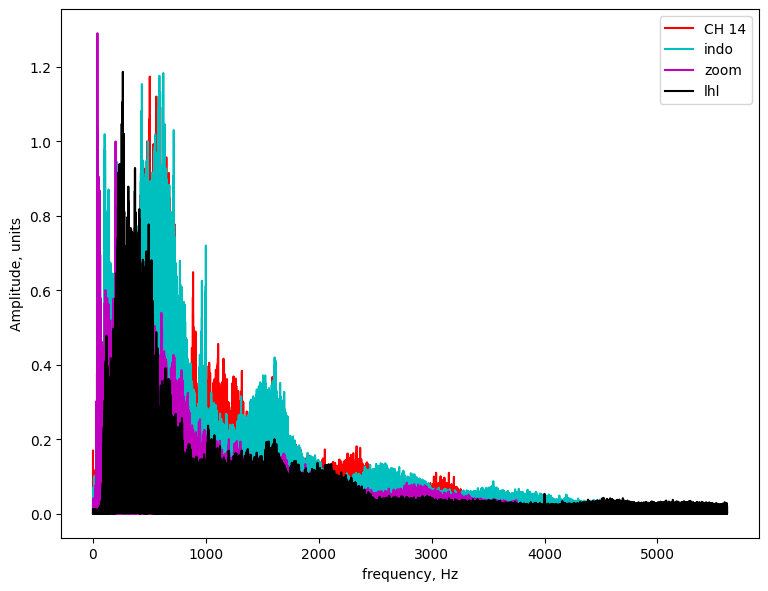

In [22]:
# ch 14 vs youtube
UPPER_LIM = 30000*500
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'r', label='CH 14')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

### individual channel

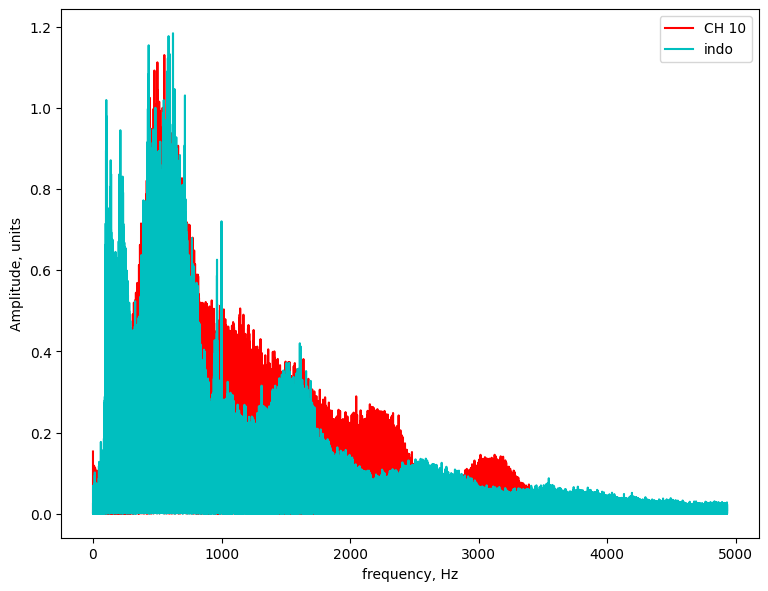

In [23]:
# ch 10 vs indo
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

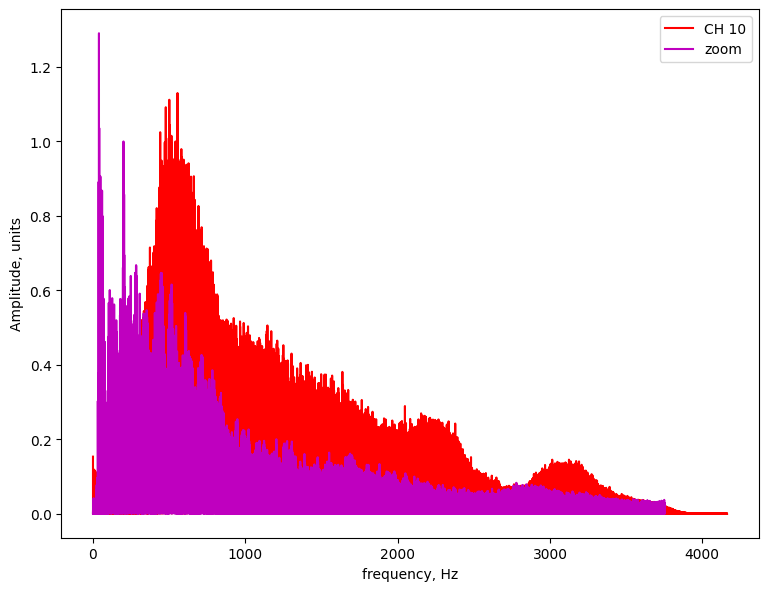

In [24]:
# ch 10 vs zoom
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

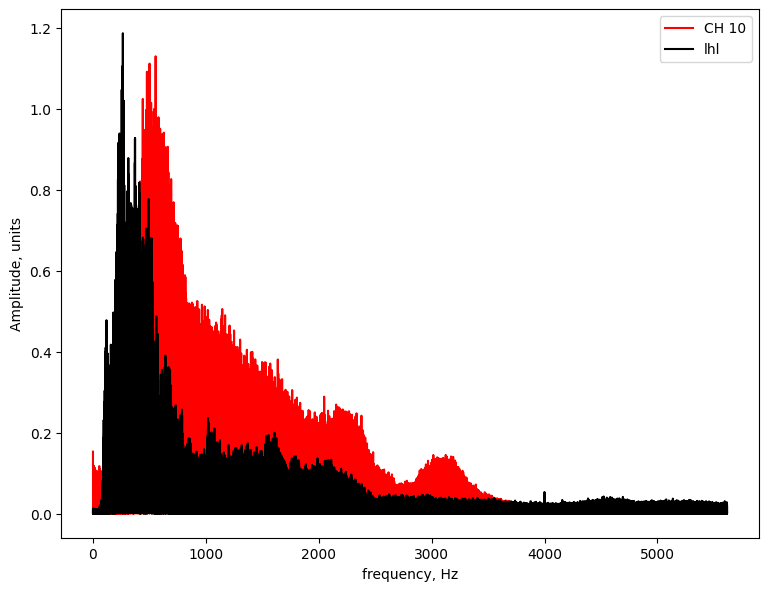

In [25]:
# ch 10 vs lhl
UPPER_LIM = 30000*500
plt.plot(freq10[:UPPER_LIM], fft_spectrum_abs10[:UPPER_LIM], 'r', label='CH 10')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

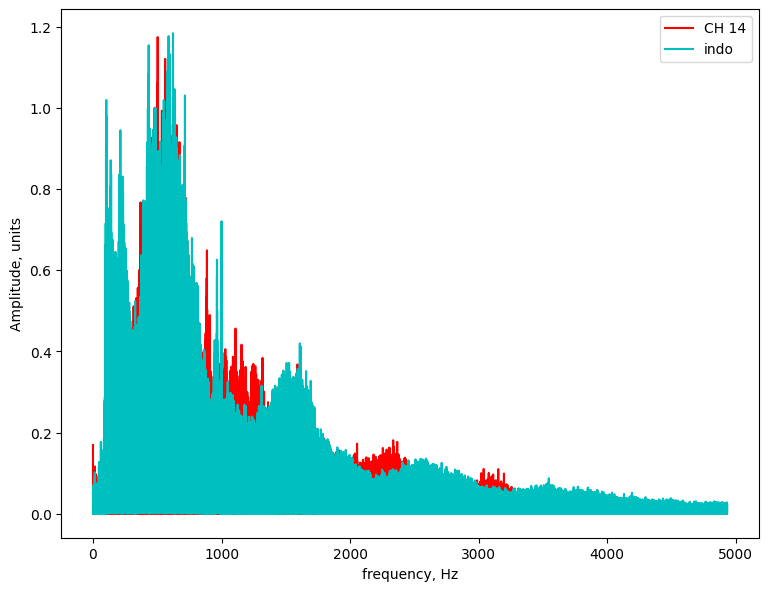

In [26]:
# ch 14 vs indo
UPPER_LIM = 30000*500
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'r', label='CH 14')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

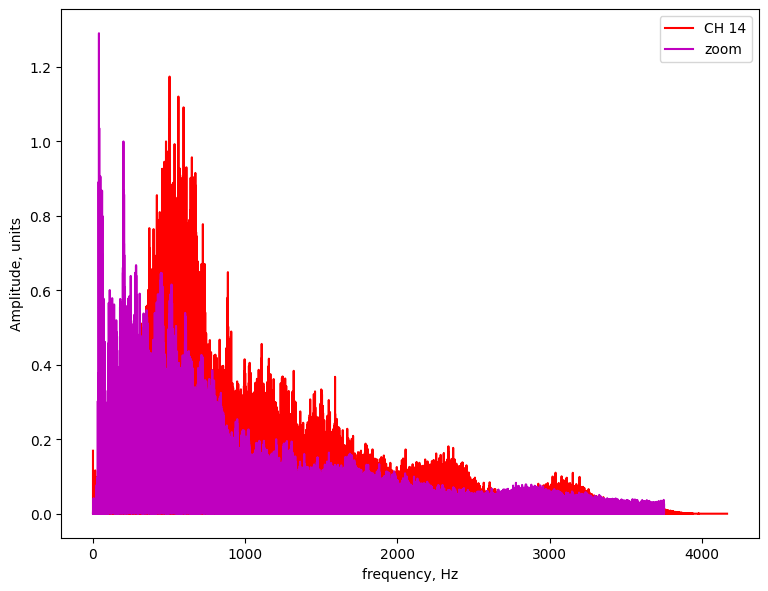

In [27]:
# ch 14 vs zoom
UPPER_LIM = 30000*500
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'r', label='CH 14')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

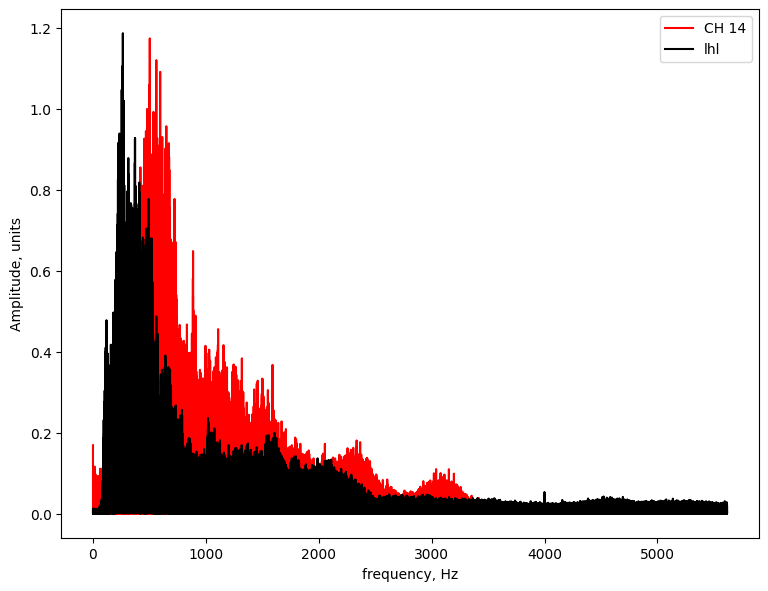

In [28]:
# ch 14 vs lhl
UPPER_LIM = 30000*500
plt.plot(freq14[:UPPER_LIM], fft_spectrum_abs14[:UPPER_LIM], 'r', label='CH 14')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

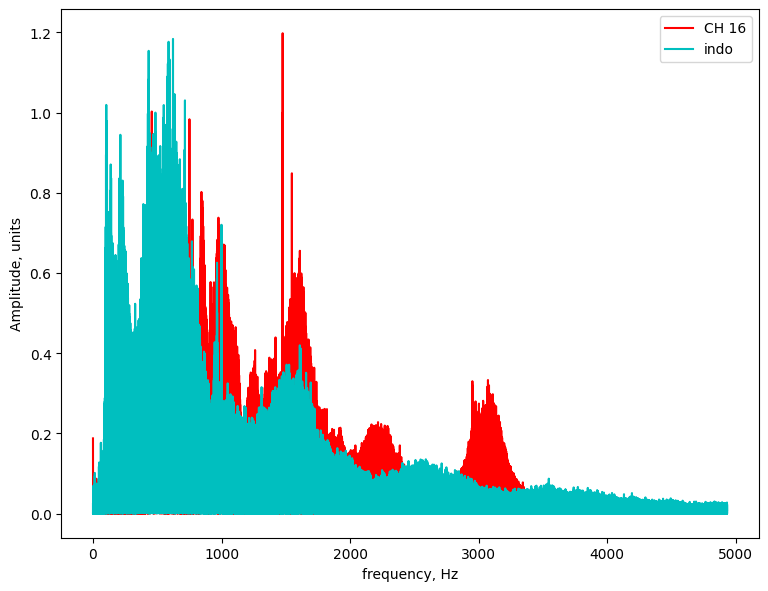

In [29]:
# ch 16 vs indo
UPPER_LIM = 30000*500
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'r', label='CH 16')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

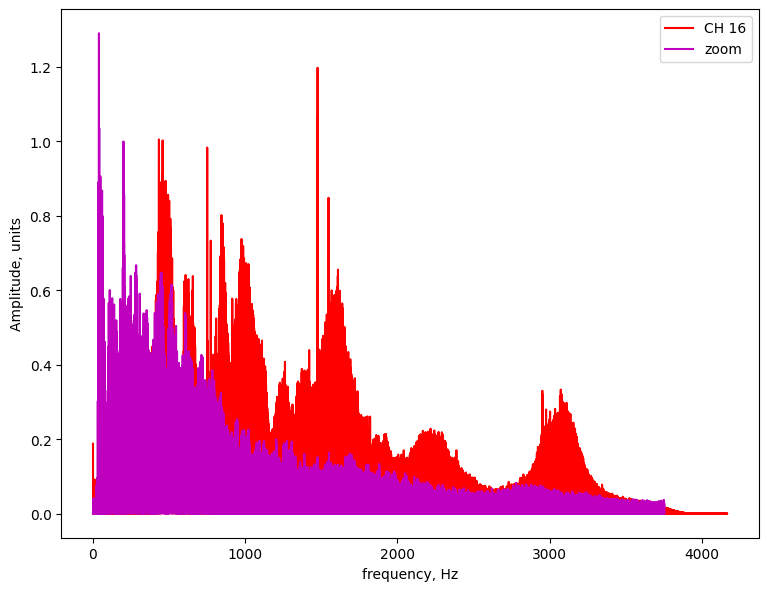

In [30]:
# ch 16 vs zoom
UPPER_LIM = 30000*500
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'r', label='CH 16')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

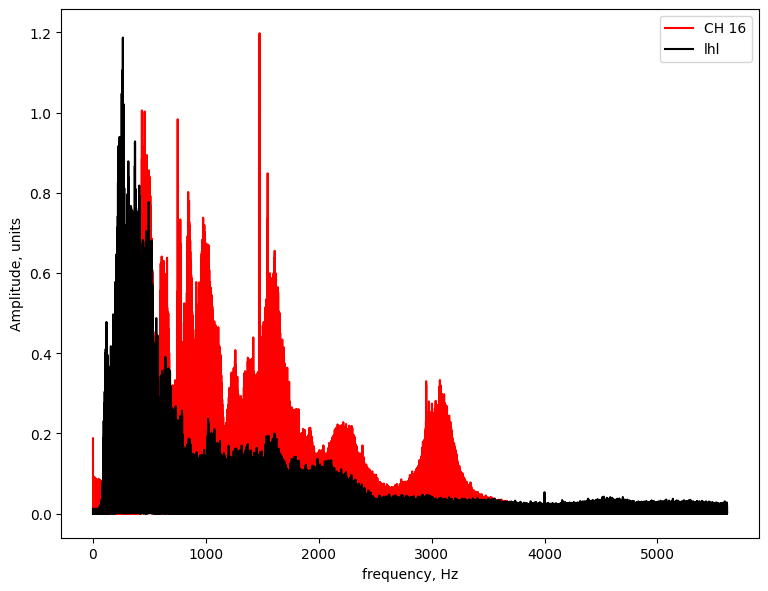

In [31]:
# ch 16 vs lhl
UPPER_LIM = 30000*500
plt.plot(freq16[:UPPER_LIM], fft_spectrum_abs16[:UPPER_LIM], 'r', label='CH 16')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

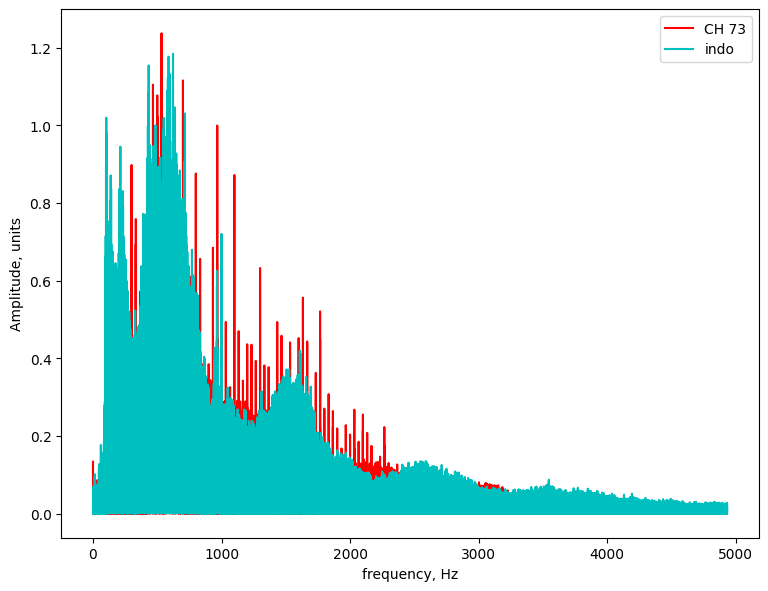

In [32]:
# ch 73 vs indo
UPPER_LIM = 30000*500
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'r', label='CH 73')
plt.plot(freq_indo[:UPPER_LIM], fft_spectrum_abs_indo[:UPPER_LIM], 'c', label='indo')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

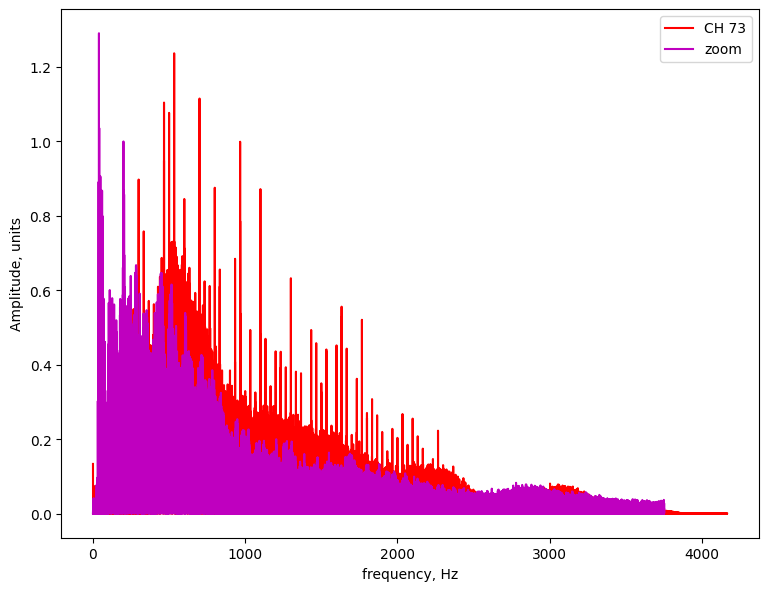

In [33]:
# ch 73 vs zoom
UPPER_LIM = 30000*500
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'r', label='CH 73')
plt.plot(freq_zoom[:UPPER_LIM], fft_spectrum_abs_zoom[:UPPER_LIM], 'm', label='zoom')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

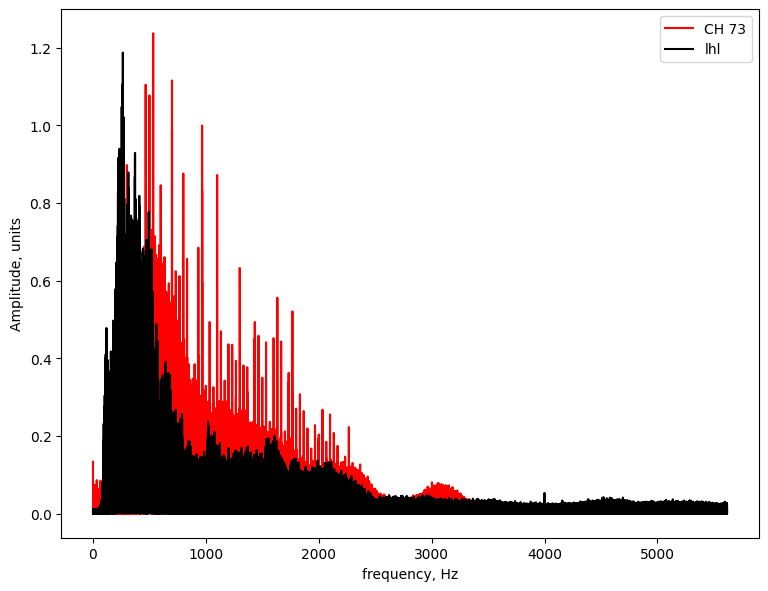

In [34]:
# ch 73 vs lhl
UPPER_LIM = 30000*500
plt.plot(freq73[:UPPER_LIM], fft_spectrum_abs73[:UPPER_LIM], 'r', label='CH 73')
plt.plot(freq_lhl[:UPPER_LIM], fft_spectrum_abs_lhl[:UPPER_LIM], 'k', label='lhl')
plt.legend(loc="upper right")
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

### To trim the wavfiles to a certain length

In [ ]:
from scipy.io import wavfile
 
def trim_wav( originalWavPath, newWavPath , start, end ):
    '''
    :param originalWavPath: the path to the source wav file
    :param newWavPath: output wav file * can be same path as original
    :param start: time in seconds
    :param end: time in seconds
    :return:
    '''
    sampleRate, waveData = wavfile.read( originalWavPath )
    startSample = int( start * sampleRate )
    endSample = int( end * sampleRate )
    wavfile.write( newWavPath, sampleRate, waveData[startSample:endSample])
 
 
wp = r'./batched_1_hr_audio/CH14_batch_0_upsampled_old.wav'
trim_wav(wp, wp.replace("_old.wav", ".wav"), 0,3600)